In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [9]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [10]:
df=df[['City','Date','AQI','AQI_Bucket','PM2.5', 'PM10','NO','SO2','NO2','CO']]

In [11]:
cities=pd.unique(df['City'])
column1= cities+'CO'
column2=cities+'_AQI_'
columns=[*column1,*column2]

In [12]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['CO']))
    final_df[i][-n:]=np.array(df[df['City']==city]['CO'])

In [13]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [14]:
final_df.tail()

,AhmedabadCO,AizawlCO,AmaravatiCO,AmritsarCO,BengaluruCO,BhopalCO,BrajrajnagarCO,ChandigarhCO,ChennaiCO,DelhiCO,...,JaipurCO,JorapokharCO,KochiCO,KolkataCO,LucknowCO,MumbaiCO,PatnaCO,ShillongCO,TalcherCO,ThiruvananthapuramCO
2020-01-01,15.889032,NaN,0.665484,0.618387,1.096452,1.066129,1.043548,0.742903,0.844839,1.570323,...,0.950645,NaN,1.349000,1.228065,1.746774,1.024194,1.933871,0.318710,1.643548,0.993871
2020-02-01,26.835517,NaN,0.560690,0.675556,1.066552,0.956552,0.189655,0.710000,0.817586,1.295172,...,1.037586,NaN,1.306552,0.872414,1.341379,1.046897,1.166552,0.407778,1.508966,0.962069
2020-03-01,8.305484,0.458571,0.511935,0.735806,0.943226,0.643929,0.182609,0.538387,0.700323,0.881290,...,0.773548,2.015625,1.192581,0.685484,1.080645,0.605484,1.272258,0.265484,1.865714,1.029677
2020-04-01,1.574667,0.293333,0.013889,0.727600,0.724000,0.600417,0.343333,0.497333,0.618667,0.780333,...,0.576667,1.789333,0.952333,0.383667,0.988000,0.451000,1.182667,0.033077,2.177333,0.482000
2020-05-01,0.580000,0.250000,NaN,0.710000,0.660000,0.530000,0.310000,0.700000,0.640000,0.970000,...,0.900000,1.140000,1.070000,0.330000,1.010000,0.320000,0.520000,0.080000,1.750000,0.450000


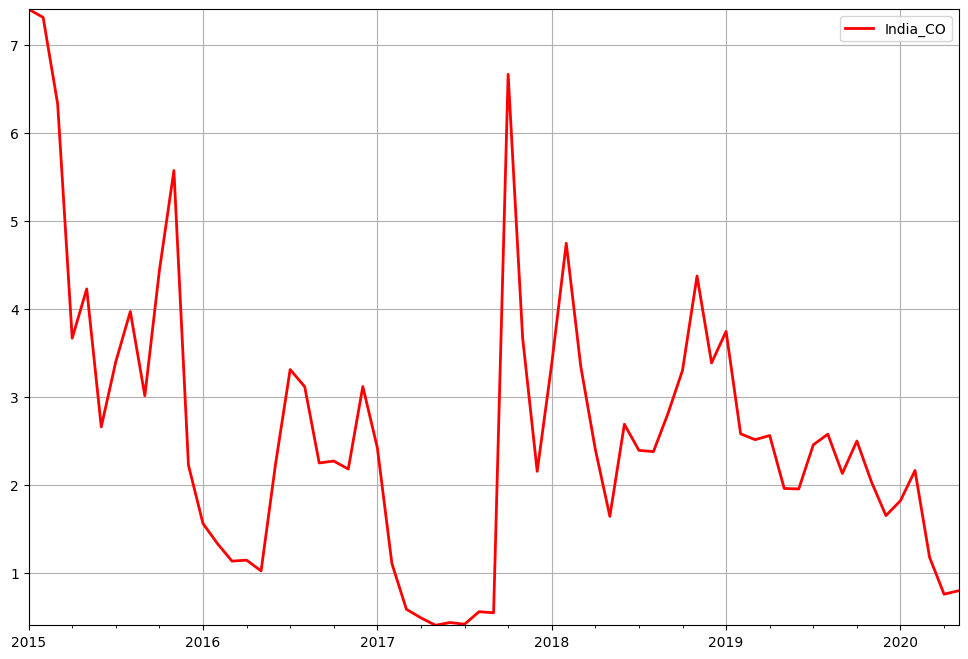

In [15]:
final_df['India_CO']=final_df.mean(axis=1)
ax=final_df[['India_CO']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [16]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadCO,AizawlCO,AmaravatiCO,AmritsarCO,BengaluruCO,BhopalCO,BrajrajnagarCO,ChandigarhCO,ChennaiCO,DelhiCO,...,JorapokharCO,KochiCO,KolkataCO,LucknowCO,MumbaiCO,PatnaCO,ShillongCO,TalcherCO,ThiruvananthapuramCO,India_CO
2019-01-01,42.160000,NaN,0.930645,0.010323,0.959032,NaN,3.078710,NaN,0.933548,1.904516,...,0.000000,NaN,1.320323,1.100968,2.632903,1.865806,NaN,2.785161,0.468387,3.742713
2019-02-01,25.738214,NaN,0.760000,0.062857,0.927857,NaN,3.238929,NaN,0.985357,1.348571,...,0.000000,NaN,1.185714,1.144286,2.273571,1.650357,NaN,2.893929,0.742500,2.577884
2019-03-01,27.013226,NaN,0.526452,0.568065,0.948710,NaN,2.891290,NaN,0.787097,1.187097,...,0.000000,NaN,0.775806,1.325161,1.784000,1.623871,NaN,2.202069,0.745806,2.511412
2019-04-01,27.554286,NaN,0.534333,0.806667,1.016000,NaN,2.172000,NaN,1.019000,1.338333,...,1.667500,NaN,0.501667,1.392333,1.809000,1.210333,NaN,1.361034,0.866333,2.558786
2019-05-01,17.854444,NaN,0.624839,0.928710,0.942258,NaN,1.217097,NaN,1.050968,1.372258,...,1.808333,NaN,0.478710,1.274839,1.663226,1.338065,NaN,1.077000,0.966129,1.956690


In [17]:
df_2019.isna().sum()

AhmedabadCO              0
AizawlCO                13
AmaravatiCO              1
AmritsarCO               0
BengaluruCO              0
BhopalCO                 8
BrajrajnagarCO           0
ChandigarhCO             8
ChennaiCO                0
DelhiCO                  0
ErnakulamCO             12
GurugramCO               0
GuwahatiCO               1
HyderabadCO              0
JaipurCO                 0
JorapokharCO             4
KochiCO                 12
KolkataCO                0
LucknowCO                0
MumbaiCO                 0
PatnaCO                  0
ShillongCO               7
TalcherCO                0
ThiruvananthapuramCO     0
India_CO                 0
dtype: int64

In [18]:
df_2019=df_2019.drop(['AizawlCO','ErnakulamCO','KochiCO',],axis=1)

In [19]:
CO_2019 = df_2019.mean(axis=0)

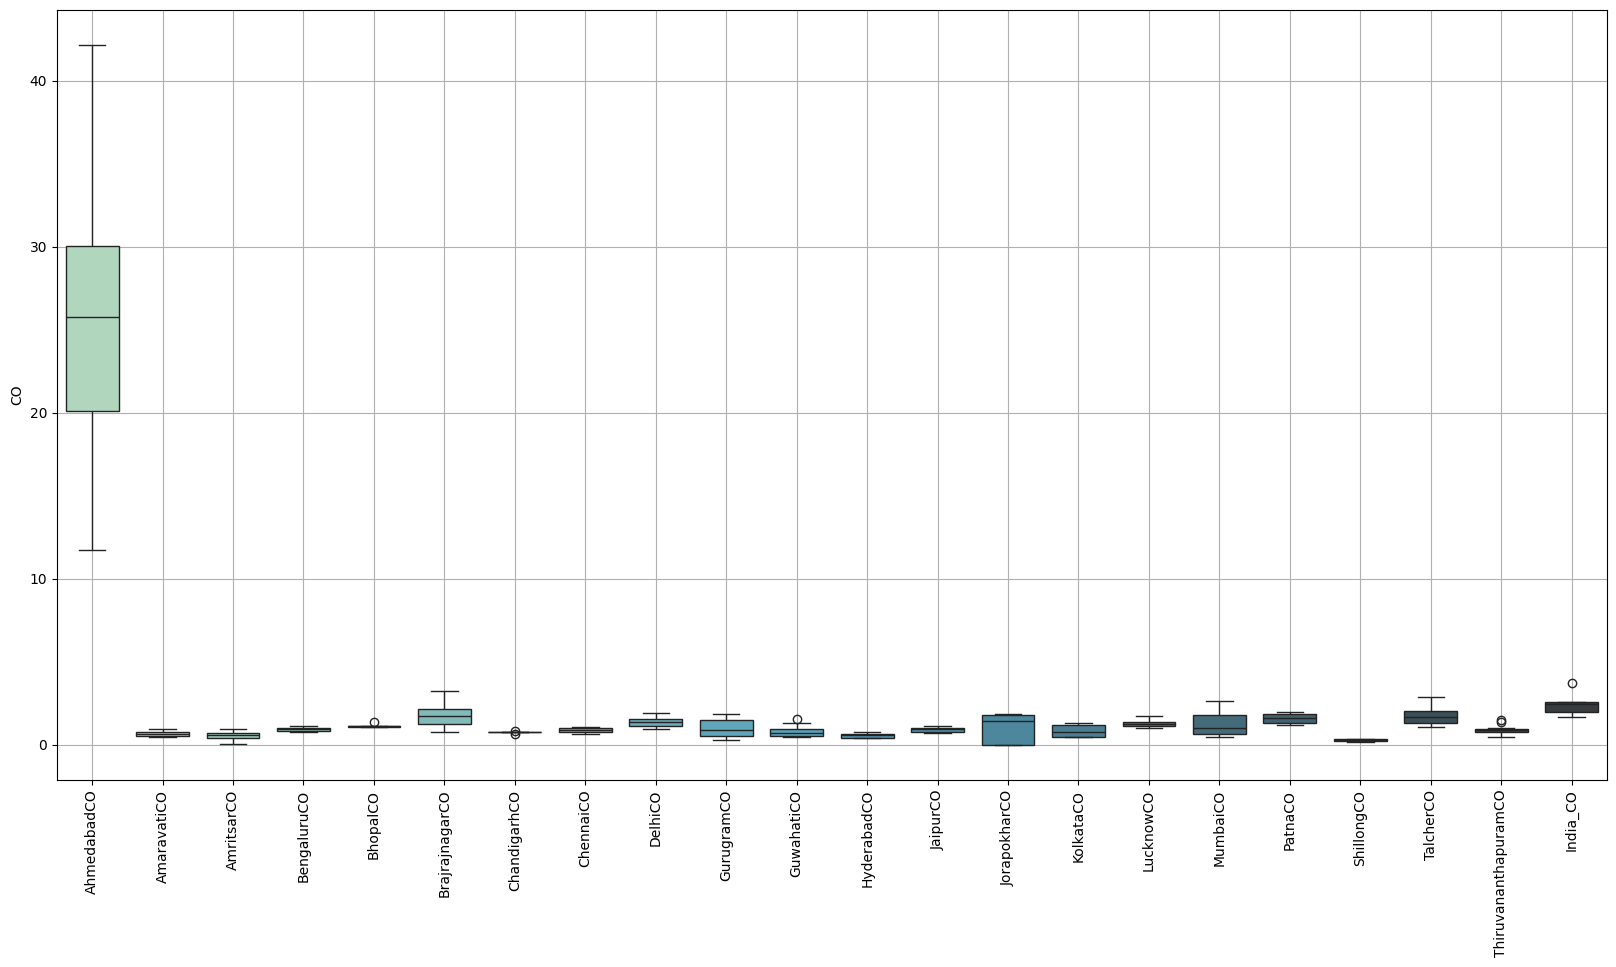

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('CO');
bplot.grid(True)

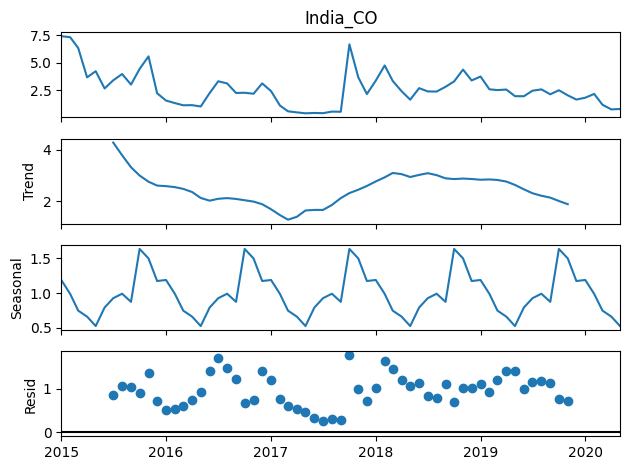

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_CO=final_df['India_CO']
result=seasonal_decompose(India_CO,model='multiplicative')
result.plot();

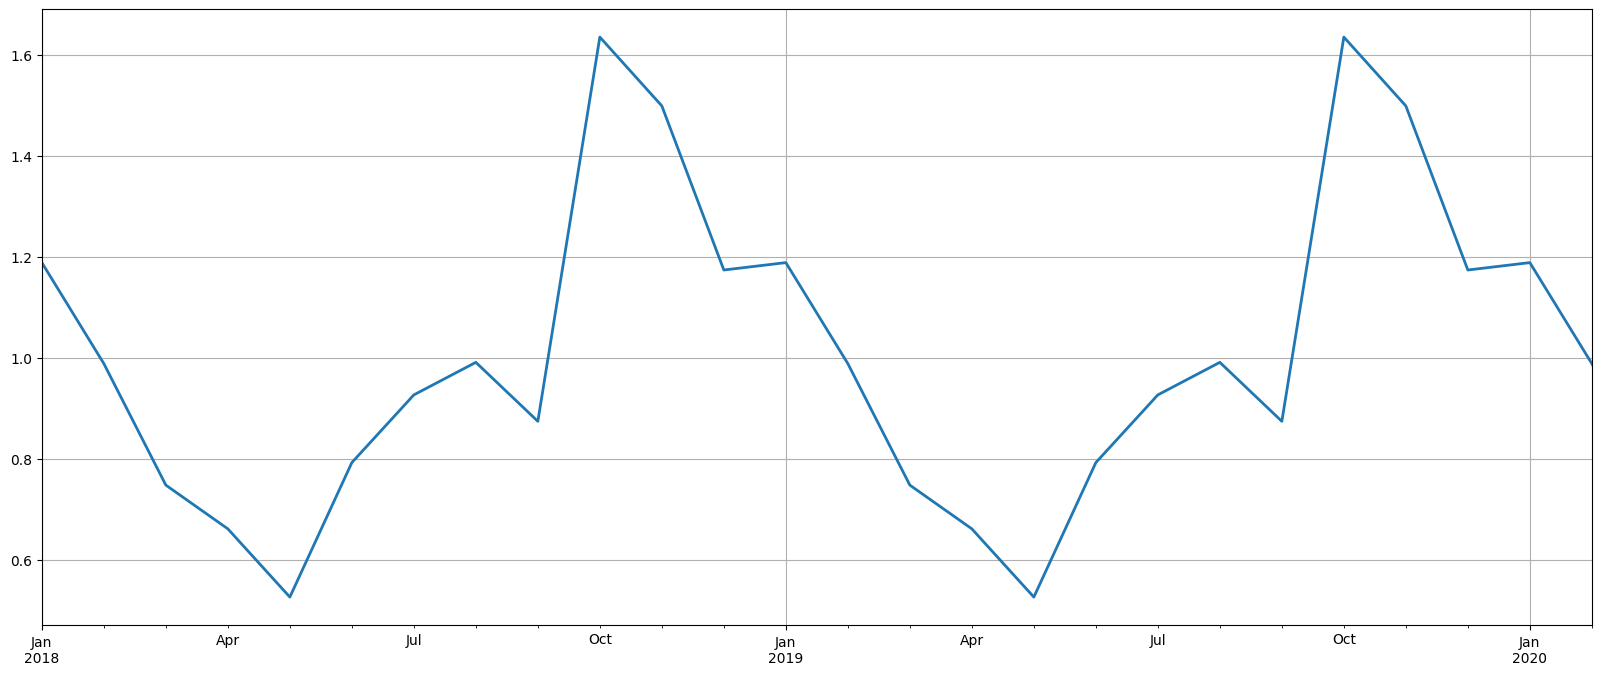

In [25]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [28]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;  

In [29]:
auto_arima(y=India_CO,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -102.706
Date:                Wed, 03 Jan 2024   AIC                            211.412
Time:                        18:32:04   BIC                            217.935
Sample:                    01-01-2015   HQIC                           213.986
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7484      0.462      1.621      0.105      -0.156       1.653
ar.L1          0.7262      0.099      7.370      0.000       0.533       0.919
sigma2         1.3645      0.232      5.883      0.000       0.910       1.819
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               172.11
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             1.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#dividing into train and test:
train=India_CO[:41]
test=India_CO[42:54]

In [32]:
# Forming the model:
model=SARIMAX(train,order=(3,3,3),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88015D+00    |proj g|=  1.42009D-01

At iterate    5    f=  1.83950D+00    |proj g|=  3.68227D-02

At iterate   10    f=  1.80845D+00    |proj g|=  3.22951D-02

At iterate   15    f=  1.80013D+00    |proj g|=  1.04808D-02

At iterate   20    f=  1.79941D+00    |proj g|=  1.68007D-03

At iterate   25    f=  1.79888D+00    |proj g|=  5.56809D-03

At iterate   30    f=  1.79882D+00    |proj g|=  1.03713D-03

At iterate   35    f=  1.79866D+00    |proj g|=  2.52027D-03


 This problem is unconstrained.



At iterate   40    f=  1.79863D+00    |proj g|=  1.00139D-03

At iterate   45    f=  1.79860D+00    |proj g|=  7.17749D-04

At iterate   50    f=  1.79859D+00    |proj g|=  3.21967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   3.220D-04   1.799D+00
  F =   1.7985943225214460     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/nishanthsundaran/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             India_CO   No. Observations:                   41
Model:             SARIMAX(3, 3, 3)x(1, 0, [1], 12)   Log Likelihood                 -73.742
Date:                              Wed, 03 Jan 2024   AIC                            165.485
Time:                                      18:33:38   BIC                            180.223
Sample:                                  01-01-2015   HQIC                           170.729
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0368      0.872     -1.189      0.234      -2.746       0.672
ar.L2         -0.3993      0.703     -0.568      0.570      -1.777       0.978
ar.L3         -0.2612      0.472     -0.554      0.580      -1.185       0.663
ma.L1         -1.1392     31.162     -0.037      0.971     -62.217      59.938
ma.L2         -0.6723      4.840     -0.139      0.890     -10.158       8.813
ma.L3          0.8409     27.044      0.031      0.975     -52.164      53.846
ar.S.L12      -0.9814      5.278     -0.186      0.853     -11.327       9.364
ma.S.L12       0.9278     10.957      0.085      0.933     -20.548      22.404
sigma2         1.9576     65.957      0.030      0.976    -127.316     131.231
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                70.09
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             1.54
Prob(H) (two-sided):                  0.24   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

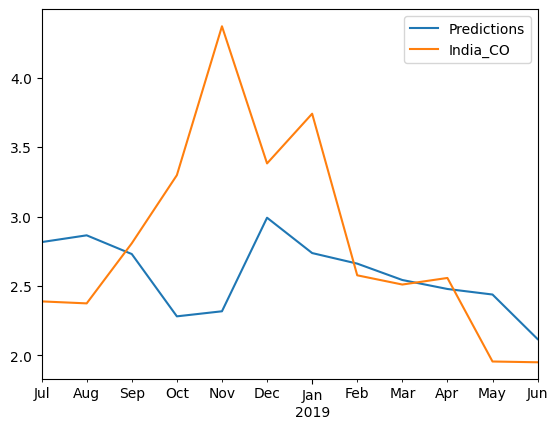

In [33]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [34]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean CO',test.mean())

RMSE =  0.7703819544436453
Mean CO 2.8274470325163263


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62676D+00    |proj g|=  4.08638D-02

At iterate    5    f=  1.61507D+00    |proj g|=  2.29442D-02

At iterate   10    f=  1.61304D+00    |proj g|=  4.47736D-03

At iterate   15    f=  1.60907D+00    |proj g|=  5.10696D-03

At iterate   20    f=  1.60781D+00    |proj g|=  6.58841D-03

At iterate   25    f=  1.60749D+00    |proj g|=  4.20251D-03

At iterate   30    f=  1.60737D+00    |proj g|=  2.90680D-03

At iterate   35    f=  1.60735D+00    |proj g|=  1.00429D-03

At iterate   40    f=  1.60733D+00    |proj g|=  5.87857D-03
  ys=-2.270E-05  -gs= 1.787E-05 BFGS update SKIPPED

At iterate   45    f=  1.60730D+00    |proj g|=  2.80013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

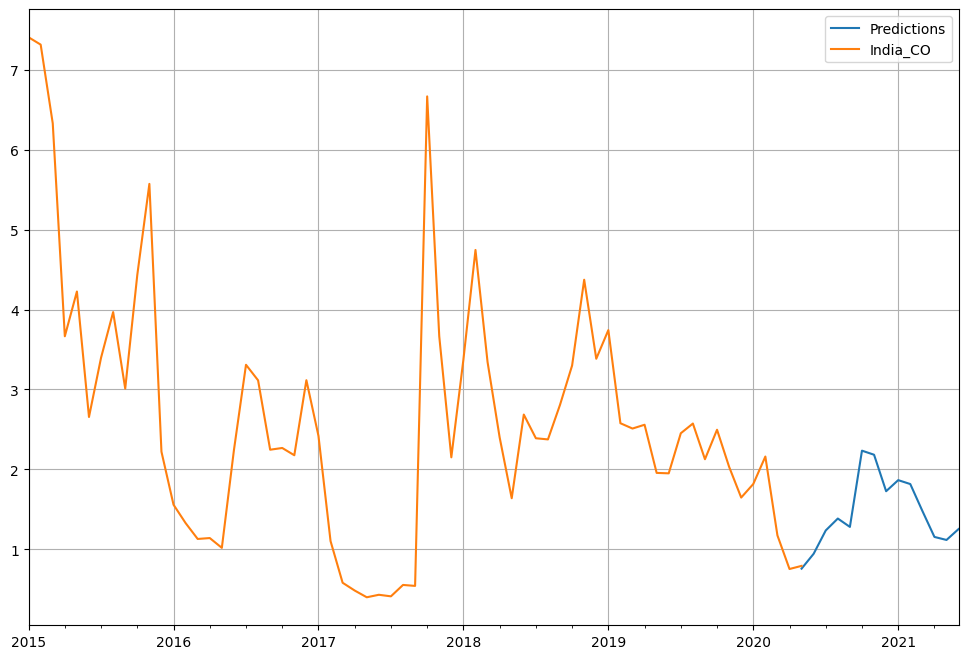

In [35]:
# Forming the model:
model=SARIMAX(India_CO,order=(2,0,0),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_CO.plot(legend=True,figsize=(12,8),grid=True);

In [45]:
predictions

2018-07-01    2.817298
2018-08-01    2.866099
2018-09-01    2.731195
2018-10-01    2.282101
2018-11-01    2.318624
2018-12-01    2.992990
2019-01-01    2.738281
2019-02-01    2.662165
2019-03-01    2.544046
2019-04-01    2.479408
2019-05-01    2.439377
2019-06-01    2.118200
Freq: MS, Name: Predictions, dtype: float64

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18206D+00    |proj g|=  5.22554D-01

At iterate    5    f=  1.82616D+00    |proj g|=  2.29311D-02

At iterate   10    f=  1.82167D+00    |proj g|=  1.74379D-03

At iterate   15    f=  1.81998D+00    |proj g|=  4.45348D-03

At iterate   20    f=  1.81902D+00    |proj g|=  5.78555D-03

At iterate   25    f=  1.81876D+00    |proj g|=  2.59824D-03

At iterate   30    f=  1.81869D+00    |proj g|=  3.69230D-03

At iterate   35    f=  1.81867D+00    |proj g|=  3.99991D-05
  ys=-2.893E-08  -gs= 1.341E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

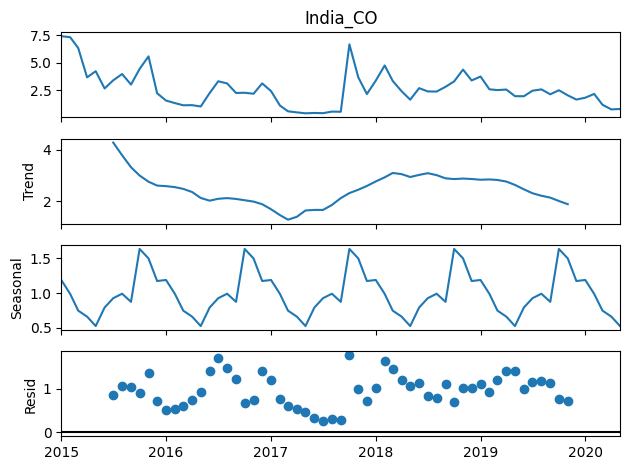

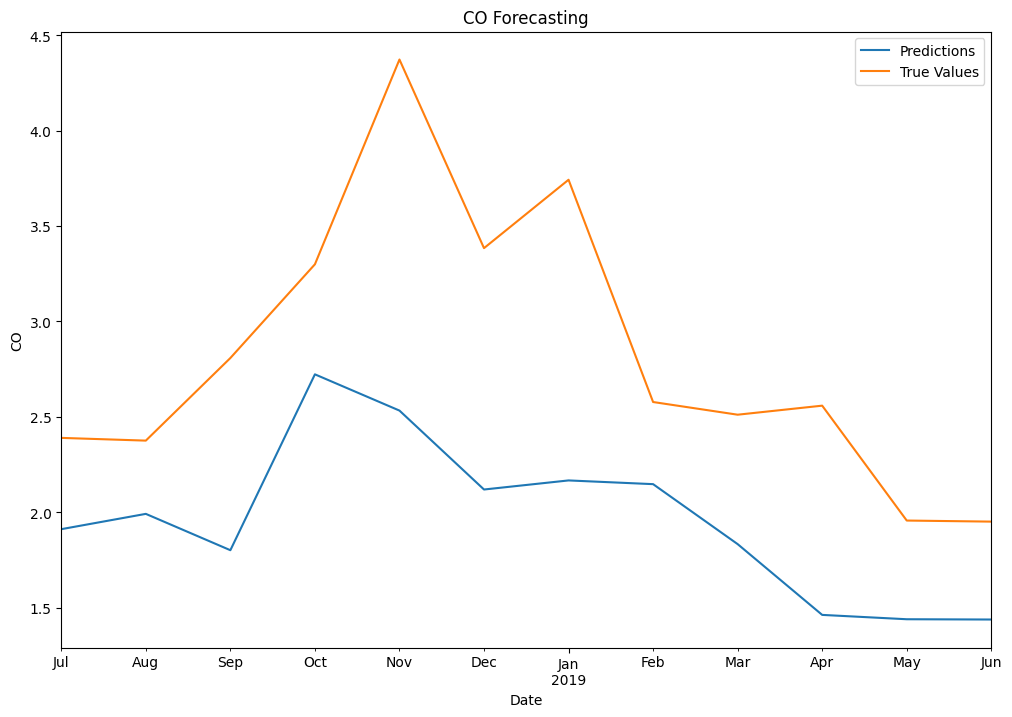

RMSE: 0.9819226910191339
Mean CO (test data): 2.8274470325163263
Forecasted CO for 2020-06-01: 1.3405037433121416


In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from IPython.display import HTML, display
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['City', 'Date', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO', 'SO2', 'NO2', 'CO']]
cities = pd.unique(df['City'])
column1 = cities + 'CO'
column2 = cities + '_AQI_'
columns = [*column1, *column2]
final_df = pd.DataFrame(index=np.arange('2015-01-01', '2020-05-02', dtype='datetime64[D]'), columns=column1)

for city, i in zip(cities, final_df.columns):
    n = len(np.array(df[df['City'] == city]['CO']))
    final_df[i][-n:] = np.array(df[df['City'] == city]['CO'])

final_df = final_df.astype('float64')
final_df = final_df.resample(rule='MS').mean()

final_df['India_CO'] = final_df.mean(axis=1)

# Plot seasonal decomposition
India_CO = final_df['India_CO']
result = seasonal_decompose(India_CO, model='multiplicative')
result.plot();

# Load specific forecasting tools
auto_arima_result = auto_arima(y=India_CO, start_p=0, start_P=0, start_q=0, start_Q=0, seasonal=True, m=12)

# Divide into train and test
train = India_CO[:41]
test = India_CO[42:54]

# Forming the model
model = SARIMAX(train, order=(2, 0, 0), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Obtain predicted values for the specific date
specific_date = '2020-06-01'
forecast = results.get_prediction(start=pd.to_datetime(specific_date), end=pd.to_datetime(specific_date), dynamic=False)
predicted_CO_specific_date = forecast.predicted_mean.values[0]

# Plotting
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')
plt.figure(figsize=(12, 8))
predictions.plot(legend=True, label='Predictions')
test.plot(legend=True, label='True Values')
plt.title('CO Forecasting')
plt.xlabel('Date')
plt.ylabel('CO')
plt.show()

# Evaluate the performance
RMSE = np.sqrt(mean_squared_error(predictions, test))
print('RMSE:', RMSE)
print('Mean CO (test data):', test.mean())
print(f'Forecasted CO for {specific_date}: {predicted_CO_specific_date}')


In [47]:
predictions

2018-07-01    1.911479
2018-08-01    1.991702
2018-09-01    1.801237
2018-10-01    2.722940
2018-11-01    2.533021
2018-12-01    2.119368
2019-01-01    2.166930
2019-02-01    2.147448
2019-03-01    1.833188
2019-04-01    1.462217
2019-05-01    1.439470
2019-06-01    1.437984
Freq: MS, Name: Predictions, dtype: float64

In [49]:
import pickle


# Save the trained model using pickle
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl', 'wb') as file:
    pickle.dump(results, file)

In [56]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the date for forecasting
specific_date = '2023-10-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted CO value for {specific_date} is: {predicted_value}")


The forecasted CO value for 2023-10-01 is: 2.417791367719257
